In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [2]:
df = pd.read_csv("train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


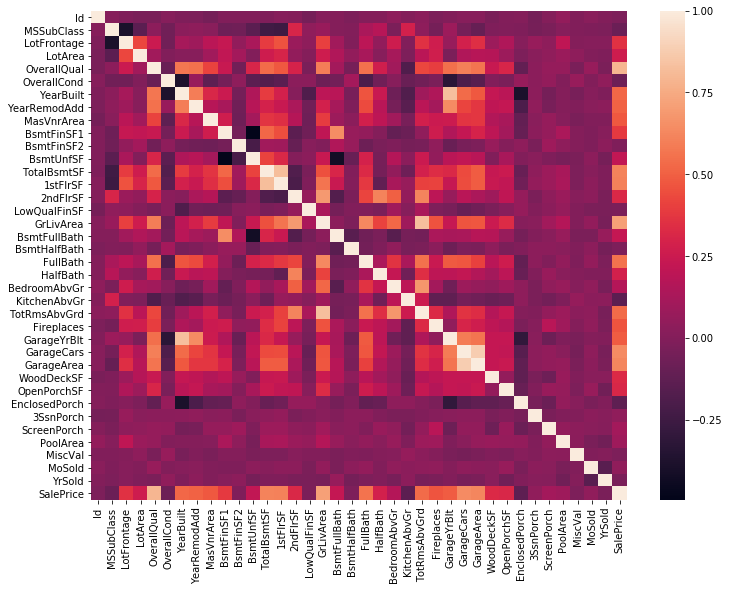

In [3]:
corrmat = df.corr()
plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat);

In [4]:
not_required = ["Id", "Street", "Alley", "Utilities", "LandSlope", "Neighborhood", "Condition2",
                "Heating", "GarageYrBlt", "GarageCond", "PavedDrive", "PoolArea", "PoolQC", 
                "Fence", "MiscFeature", "MiscVal", "MoSold", "FireplaceQu"]
required = set(df.columns.tolist()) - set(not_required)
required = list(required)

df = df[required]
df.head()

,3SsnPorch,RoofMatl,Condition1,HeatingQC,BsmtCond,YearRemodAdd,GarageFinish,EnclosedPorch,BsmtFinSF1,SalePrice,...,Functional,GarageQual,1stFlrSF,BsmtHalfBath,Electrical,LotFrontage,BsmtExposure,OverallQual,BedroomAbvGr,BsmtQual
0,0,CompShg,Norm,Ex,TA,2003,RFn,0,706,208500,...,Typ,TA,856,0,SBrkr,65.0,No,7,3,Gd
1,0,CompShg,Feedr,Ex,TA,1976,RFn,0,978,181500,...,Typ,TA,1262,1,SBrkr,80.0,Gd,6,3,Gd
2,0,CompShg,Norm,Ex,TA,2002,RFn,0,486,223500,...,Typ,TA,920,0,SBrkr,68.0,Mn,7,3,Gd
3,0,CompShg,Norm,Gd,Gd,1970,Unf,272,216,140000,...,Typ,TA,961,0,SBrkr,60.0,No,7,3,TA
4,0,CompShg,Norm,Ex,TA,2000,RFn,0,655,250000,...,Typ,TA,1145,0,SBrkr,84.0,Av,8,4,Gd


In [5]:
from sklearn.preprocessing import LabelBinarizer

# label encode "CentralAir"

lb = LabelBinarizer()
df["CentralAir"] = lb.fit_transform(df["CentralAir"])
df.head()

,3SsnPorch,RoofMatl,Condition1,HeatingQC,BsmtCond,YearRemodAdd,GarageFinish,EnclosedPorch,BsmtFinSF1,SalePrice,...,Functional,GarageQual,1stFlrSF,BsmtHalfBath,Electrical,LotFrontage,BsmtExposure,OverallQual,BedroomAbvGr,BsmtQual
0,0,CompShg,Norm,Ex,TA,2003,RFn,0,706,208500,...,Typ,TA,856,0,SBrkr,65.0,No,7,3,Gd
1,0,CompShg,Feedr,Ex,TA,1976,RFn,0,978,181500,...,Typ,TA,1262,1,SBrkr,80.0,Gd,6,3,Gd
2,0,CompShg,Norm,Ex,TA,2002,RFn,0,486,223500,...,Typ,TA,920,0,SBrkr,68.0,Mn,7,3,Gd
3,0,CompShg,Norm,Gd,Gd,1970,Unf,272,216,140000,...,Typ,TA,961,0,SBrkr,60.0,No,7,3,TA
4,0,CompShg,Norm,Ex,TA,2000,RFn,0,655,250000,...,Typ,TA,1145,0,SBrkr,84.0,Av,8,4,Gd


In [6]:
# Make YearBuilt to How Old the property is
df["YearBuilt"] = df["YearBuilt"].apply(lambda x: 2018 - x)
df["YearRemodAdd"] = df["YearRemodAdd"].apply(lambda x: 2018 - x)
df["YrSold"] = df["YrSold"].apply(lambda x: 2018 - x)

In [7]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['BsmtCond', 'GarageFinish', 'MasVnrType', 'MasVnrArea', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'GarageQual', 'Electrical', 'LotFrontage', 'BsmtExposure', 'BsmtQual']


In [8]:
# print percentage null values
for col_name in null_having_cols:
    print("{0} : {1:.2f}".format(col_name, df[col_name].isnull().sum() / len(df)))

BsmtCond : 0.03
GarageFinish : 0.06
MasVnrType : 0.01
MasVnrArea : 0.01
BsmtFinType1 : 0.03
BsmtFinType2 : 0.03
GarageType : 0.06
GarageQual : 0.06
Electrical : 0.00
LotFrontage : 0.18
BsmtExposure : 0.03
BsmtQual : 0.03


In [9]:
# replace "NA" with "NO" to avoid confusion with nan
df["GarageType"] = df["GarageType"].fillna("NO")
df["BsmtFinType1"] = df["BsmtFinType1"].fillna("NO")
df["MasVnrType"]= df["MasVnrType"].fillna("NO")
df["BsmtExposure"]= df["BsmtExposure"].fillna("NOB") # no is already present
df["BsmtFinType2"] = df["BsmtFinType2"].fillna("NO")
df["GarageType"] = df["GarageType"].fillna("NO")
df["GarageFinish"] = df["GarageFinish"].fillna("NO")
df["GarageQual"] = df["GarageQual"].fillna("NO")
df["BsmtQual"] = df["BsmtQual"].fillna("NO")
df["Electrical"] = df["Electrical"].fillna("SBrkr") # there is only 1 nan in "Electrical" 
df["BsmtCond"] = df["BsmtCond"].fillna("NO");

In [10]:
# check which cols have null values
null_having_cols = df.isnull().any()
null_having_cols = null_having_cols[null_having_cols == True]
null_having_cols = null_having_cols.index.tolist()
print("Columns with null values: {}".format(null_having_cols))

Columns with null values: ['MasVnrArea', 'LotFrontage']


In [11]:
from sklearn.preprocessing import Imputer

# imputer for missing real values
imp = Imputer(strategy="mean")
df[null_having_cols] = imp.fit_transform(df[null_having_cols])

In [12]:
df_one_hot = pd.get_dummies(df)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_vars = df_one_hot.columns.tolist()
X_vars.remove("SalePrice")
X = df_one_hot[X_vars]
y = df_one_hot["SalePrice"]
X_sca = StandardScaler()
X = X_sca.fit_transform(X)
y_sca = StandardScaler()
y = y_sca.fit_transform(y.values.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

C:\Users\makul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
C:\Users\makul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [14]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

C:\Users\makul\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, presort='auto', random_state=None,
             subsample=1.0, verbose=0, warm_start=False)

In [15]:
y_pred = clf.predict(X_test)

In [16]:
clf.score(X_test, y_test)

0.9031740951816667

In [17]:
y_sca.inverse_transform(y_pred[:20])

array([ 99212.24857565, 105370.47168779, 207365.60587443, 204484.40589037,
       125470.03688443, 180023.78011847, 148336.00933151, 176239.44925746,
       147501.75605151, 176845.84255863, 133216.8423527 , 115575.50917433,
        95063.88952643, 137554.41527938, 139418.58641347, 525045.41864263,
        87629.46238023, 135129.17313778, 117813.8066394 , 130378.0506367 ])

In [18]:
y_sca.inverse_transform(y_test[:20]).flatten()

array([109900., 121600., 206300., 169000., 141500., 185000., 147000.,
       178000., 144000., 163000., 122500., 120000.,  87000., 135000.,
       132000., 485000.,  79000., 133000., 154900., 127500.])

# Testing

In [19]:
test_df = pd.read_csv("test.csv")
test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [20]:
not_required = ["Id", "Street", "Alley", "Utilities", "LandSlope", "Neighborhood", "Condition2",
                "Heating", "GarageYrBlt", "GarageCond", "PavedDrive", "PoolArea", "PoolQC", 
                "Fence", "MiscFeature", "MiscVal", "MoSold", "FireplaceQu"]
required = set(df.columns.tolist()) - set(not_required)
required = list(required)
required.remove("SalePrice")
test_df = test_df[required]
test_df.head()

,3SsnPorch,RoofMatl,2ndFlrSF,Exterior1st,Condition1,HeatingQC,GarageArea,BsmtFullBath,LotShape,BsmtCond,...,LowQualFinSF,ExterQual,BsmtExposure,CentralAir,Exterior2nd,YrSold,OverallQual,BsmtUnfSF,BedroomAbvGr,BsmtQual
0,0,CompShg,0,VinylSd,Feedr,TA,730.0,0.0,Reg,TA,...,0,TA,No,Y,VinylSd,2010,5,270.0,2,TA
1,0,CompShg,0,Wd Sdng,Norm,TA,312.0,0.0,IR1,TA,...,0,TA,No,Y,Wd Sdng,2010,6,406.0,3,TA
2,0,CompShg,701,VinylSd,Norm,Gd,482.0,0.0,IR1,TA,...,0,TA,No,Y,VinylSd,2010,5,137.0,3,Gd
3,0,CompShg,678,VinylSd,Norm,Ex,470.0,0.0,IR1,TA,...,0,TA,No,Y,VinylSd,2010,6,324.0,3,TA
4,0,CompShg,0,HdBoard,Norm,Ex,506.0,0.0,IR1,TA,...,0,Gd,No,Y,HdBoard,2010,8,1017.0,2,Gd


In [21]:
# Make YearBuilt to How Old the property is
test_df["YearBuilt"] = test_df["YearBuilt"].apply(lambda x: 2018 - x)
test_df["YearRemodAdd"] = test_df["YearRemodAdd"].apply(lambda x: 2018 - x)
test_df["YrSold"] = test_df["YrSold"].apply(lambda x: 2018 - x)

In [22]:
# check which cols have null values
null_having_cols_test = test_df.isnull().any()
null_having_cols_test = null_having_cols_test[null_having_cols_test == True]
null_having_cols_test = null_having_cols_test.index.tolist()
print("Columns with null values: {}".format(null_having_cols_test))

Columns with null values: ['Exterior1st', 'GarageArea', 'BsmtFullBath', 'BsmtCond', 'BsmtFinSF2', 'GarageFinish', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinType1', 'BsmtFinType2', 'GarageType', 'MasVnrType', 'Functional', 'SaleType', 'GarageQual', 'TotalBsmtSF', 'KitchenQual', 'BsmtHalfBath', 'GarageCars', 'LotFrontage', 'MSZoning', 'BsmtExposure', 'Exterior2nd', 'BsmtUnfSF', 'BsmtQual']


In [23]:
# Create custom imputer
from sklearn.base import TransformerMixin

class StringImputer(TransformerMixin):
    
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        self.fill = pd.Series([X[c].value_counts().index[0]
            if X[c].dtype == np.dtype("O") else X[c].mean()
                             for c in X], index=X.columns)
        return self
    
    def transform(self, X, y=None):
        return X.fillna(self.fill)

In [24]:
simp = StringImputer()
test_df = simp.fit_transform(test_df)

In [25]:
# print percentage null values
for col_name in null_having_cols:
    print("Name: {0}   \tCount: {1}\tPer: {2:.2f}  Type: {3}".format(col_name, 
            test_df[col_name].isnull().sum(), test_df[col_name].isnull().sum() / len(df),
            test_df[col_name].dtype))

Name: MasVnrArea   	Count: 0	Per: 0.00  Type: float64
Name: LotFrontage   	Count: 0	Per: 0.00  Type: float64


In [27]:
test_df_one_hot = pd.get_dummies(test_df)

In [28]:
unset_cols = set(df_one_hot.columns) - set(test_df_one_hot)
for unset in unset_cols:
    test_df_one_hot[unset] = 0

In [35]:
X_sca.

1460

In [29]:
result = clf.predict(X_sca.transform(test_df_one_hot))

ValueError: operands could not be broadcast together with shapes (1459,223) (220,) (1459,223) 

In [ ]:
x = y_sca.inverse_transform(result)

In [ ]:
with open("results.csv", "w") as out:
    for indx, row in test_df.iterrows():
        out.write("{}, {}\n".format(row["Id"], x[indx]))

In [ ]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_sca.inverse_transform(y_test), y_sca.inverse_transform(y_pred))

In [33]:
df["Electrical"].value_counts()

SBrkr    1334
FuseA      95
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

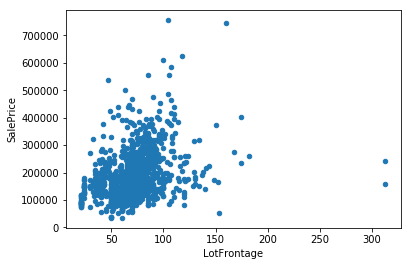

In [40]:
df.plot(kind="scatter", x="LotFrontage", y="SalePrice")